In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

In [24]:
df = pd.read_excel('~/Downloads/member.xls')
df = df.loc[:, 'TNP': 'Height']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10118 entries, 0 to 10117
Data columns (total 13 columns):
TNP           10118 non-null int64
Region        10118 non-null object
Age           10064 non-null float64
Gender        10118 non-null int64
SS            10118 non-null int64
Rosvit        9557 non-null object
Postgrad      9169 non-null float64
Experience    7180 non-null float64
SocSt         9352 non-null float64
Branch        3715 non-null float64
Salary        4009 non-null float64
Weight        9351 non-null float64
Height        9350 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 1.0+ MB


In [25]:
results = ols('Weight ~ C(SS)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     1516.
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:11:52   Log-Likelihood:                -37710.
No. Observations:                9351   AIC:                         7.543e+04
Df Residuals:                    9347   BIC:                         7.546e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.5114      0.193    376.125      0.000      72.133      72.889
C(SS)[T.2]   -21.8394      0.329    -66.448      0.000     -22.484     -21.195
C(SS)[T.3]    -4.8247      0.576     -8.372      0.000      -5.954      -3.695
C(SS)[T.4]    -2.6914      0.459     -5.858      0.000      -3.592      -1.791
==============================================================================
Omnibus:                      166.491   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.727
Skew:                           0.324   Prob(JB):                     6.94e-39
Kurtosis:                       3.175   Cond. No.                         4.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(SS),8.475849e+05,3.0,1515.502155,0.0
Residual,1.742519e+06,9347.0,NaN,NaN


In [27]:
plt.rcParams['figure.figsize'] = (10,10)

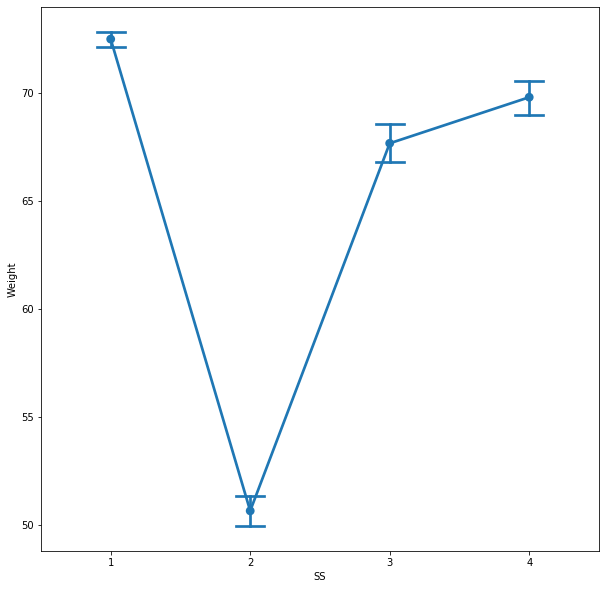

In [28]:
sns.pointplot(x='SS', y='Weight', data=df, capsize=.2)

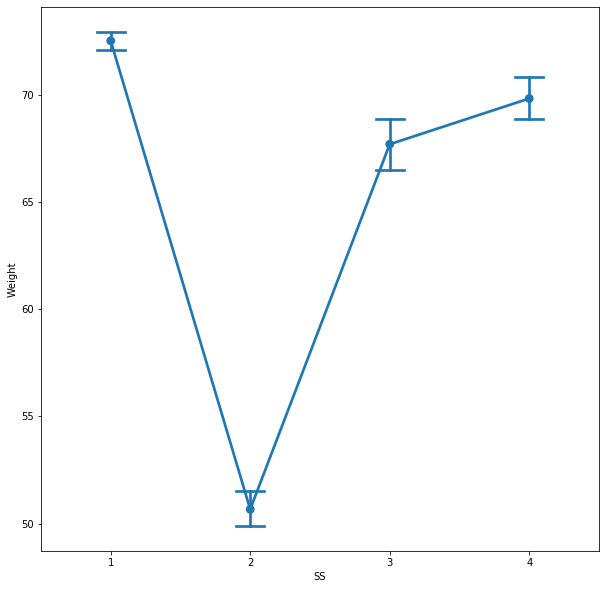

In [29]:
alpha_bonf = 0.05 / 4
sns.pointplot(x='SS', y='Weight', data=df, capsize=.2, ci=100-alpha_bonf*100)

In [30]:
df = df[['SS', 'Weight']].dropna()

In [31]:
stats.levene(df['Weight'][df['SS']==1],
            df['Weight'][df['SS']==2],
            df['Weight'][df['SS']==3],
            df['Weight'][df['SS']==4])

LeveneResult(statistic=218.9764697063374, pvalue=2.72888315220412e-137)